### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


#### (1) What is the independent variable? What is the dependent variable?

- The independent variable is whether the test presents a match of word and colour not. If the colour of the word and the word match, it is Congruent; if they don't, it is Incongruent.

- The dependent variable is the reaction time taken by the participants.

#### (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The idea of this test is to see if the difference in our samples is because of the fact that the congruent and incongruent tests are significantly different.

- The null hypothesis would be that the congruent and incongruent populations are not significantly different
- The alternative hyptothesis would be that the congruent and incongruent populations are significantly different


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
df = pd.read_csv('stroopdata.csv')
len(df)

24

From the above we can see that the population of the sample is 24, and under 30; also the same participant is measured at two time points (Before and After). This means that the most appropriate test for us to do is a Paired T-Test.

#### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [ ]:
# Perform the analysis here

In [5]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [5]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


- The congruent sample has a mean of 14.051125 seconds and a standard deviation of 3.559358 seconds
- The incongruent sample has a mean of 22.015917 seconds and a standard deviation of 4.797057 seconds

#### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [ ]:
# Build the visualizations here

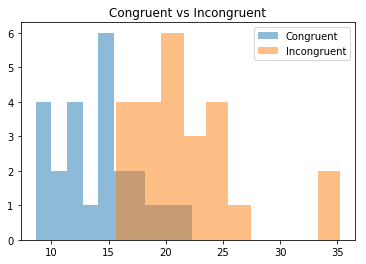

In [7]:
plt.hist(df.Congruent, alpha=0.5, label='Congruent')
plt.hist(df.Incongruent, alpha=0.5, label='Incongruent')
plt.legend(loc='upper right')
plt.title('Congruent vs Incongruent');

,Congruent,Incongruent
Congruent,1.00000,0.35182
Incongruent,0.35182,1.00000


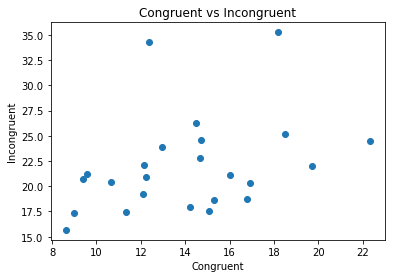

In [9]:
plt.scatter(x = df['Congruent'], y = df['Incongruent']);
plt.xlabel('Congruent')
plt.ylabel('Incongruent')
plt.title('Congruent vs Incongruent');

#this will show is the correlation
df.corr()

The first chart here shows two histograms overlayed on top of each other. This shows that the Congruent population looks right skewed and the Incongruent population to be normally distributed.

The most likely reaction time for Congruent dat is 15 seconds but for Incongruent it is around 21 seconds.

The second chart and the corresponding table show that there is week correlation between Congruent and Incongruent results.

#### (5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [48]:
# Perform the statistical test here
#this method will use scipy but lets also do it a longer way round
from scipy.stats import ttest_rel
ttest_rel(df['Congruent'], df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

Below is the calculation that we are trying to do first, to get the standard deviation

$$S^2=\frac{\sum (x-M)^2}{n-1}$$

In [12]:
#first lets define our two populations
cong = df['Congruent']
incong = df['Incongruent']

In [30]:
#now lets work out the means of the data which we can use in a calculation to get the t-statistics
#the point estimate here is the difference between the two means and will represent M on the above
cong_mean = cong.mean()
incong_mean = incong.mean()
point_estimate = cong_mean - incong_mean

print('The mean for congruent population is', cong_mean)
print('The mean for incongruent population is', incong_mean)
print('\nThe point estimate (M) is', point_estimate)

The mean for congruent population is 14.051125
The mean for incongruent population is 22.0159166667

The point estimate (M) is -7.96479166667


In [31]:
#now lets use the point estimate and get the square of all the differences
#this is the equivalent of the numerator in in the formula above
square_sums = (((cong - incong) - point_estimate) ** 2)


In [36]:
#now lets get the variance of the difference, so we can calculation standard deviation (which is square root of variance)
#the variance here is represented by S^2 in the formula above
#the second part of the sum below is the denominator of the formula

variance = sum(square_sums) / (len(df) - 1) 

print('The Variance (S^2) is', variance)


The Variance (S^2) is 23.6665408678


In [38]:
#to get the standard deviation we can get the square root of this using numpy
import numpy as np
stdev = np.sqrt(variance)

print('The Standard Deviation (S) of the datasets is', stdev)

The Standard Deviation (S) of the datasets is 4.86482691036


Now we can calculate the t statistic using the below formula

$$t=\frac{\bar x - \mu}{^s/_\sqrt n}$$

In [49]:
#numerator represents the sum of differences
# denomiator represents the standard deviation divided by the square root of the sample size

t_stat = (sum(cong - incong) / stdev) / np.sqrt(len(df))

print('Our t-statistic is', t_stat)
# to confirm our calculations, we can see that this matches what was given using scipy above

Our t-statistic is -8.02070694411


From the t-table (link below) we can see that our critical values using a two tailed test and alpha values of 0.05 (0.025 in each tail) are 2.069 and -2.069

Using the data above, we can see that our T-statistic value is beyond our critical value, this means that we reject the null hypothesis and the congruent and incongruent populations are significantly different. This means that based on our analysis, the Stroop Effect holds and the difference in word and colour does impact response time.

## References
https://en.wikipedia.org/wiki/Stroop_effect

https://stackoverflow.com/questions/13404468/t-test-in-pandas

https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

https://en.wikibooks.org/wiki/LaTeX/Mathematics

http://www.statisticshowto.com/probability-and-statistics/t-distribution/t-score-formula/

http://www.ttable.org/